# Project 1: Linear Regression Model

This is the first project of our data science fundamentals. This project is designed to solidify your understanding of the concepts we have learned in Regression and to test your knowledge on regression modelling. There are four main objectives of this project.

1\. Build Linear Regression Models 
* Use closed form solution to estimate parameters
* Use packages of choice to estimate parameters<br>

2\. Model Performance Assessment
* Provide an analytical rationale with choice of model
* Visualize the Model performance
  * MSE, R-Squared, Train and Test Error <br>

3\. Model Interpretation

* Intepret the results of your model
* Intepret the model assement <br>
    
4\. Model Dianostics
* Does the model meet the regression assumptions
    
#### About this Notebook

1\. This notebook should guide you through this project and provide started code
2\. The dataset used is the housing dataset from Seattle homes
3\. Feel free to consult online resources when stuck or discuss with data science team members


Let's get started.

### Packages

Importing the necessary packages for the analysis

In [1]:
# Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model and data preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

%matplotlib inline


Now that you have imported your packages, let's read the data that we are going to be using. The dataset provided is a titled *housing_data.csv* and contains housing prices and information about the features of the houses. Below, read the data into a variable and visualize the top 8 rows of the data.  

In [2]:
# Initiliazing seed
np.random.seed(42)

data1 = pd.read_csv('housing_data.csv')
data = pd.read_csv('housing_data_2.csv')
data.head(8)


,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
0,35760,1831,3627,3,807,625000
1,22950,1518,3608,2,840,475000
2,18386,1675,3493,3,870,295000
3,14100,1968,3447,3,1014,381000
4,10896,1440,3395,2,0,200000
5,53504,1690,3279,3,841,538000
6,14720,2053,3238,2,666,410000
7,12692,3228,3228,3,546,430000


### Split data into train and test

In the code below, we need to split the data into the train and test for modeling and validation of our models. We will cover the Train/Validation/Test as we go along in the project. Fill the following code.

1\. Subset the features to the variable: features <br>
2\. Subset the target variable: target <br>
3\. Set the test size in proportion in to a variable: test_size <br>


In [3]:
features = data[['lot_area', 'firstfloor_sqft', 'living_area', 'bath', 'garage_area', 'price']]
target = data['price']
test_size = .33


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

### Data Visualization

The best way to explore the data we have is to build some plots that can help us determine the relationship of the data. We can use a scatter matrix to explore all our variables. Below is some starter code to build the scatter matrix  

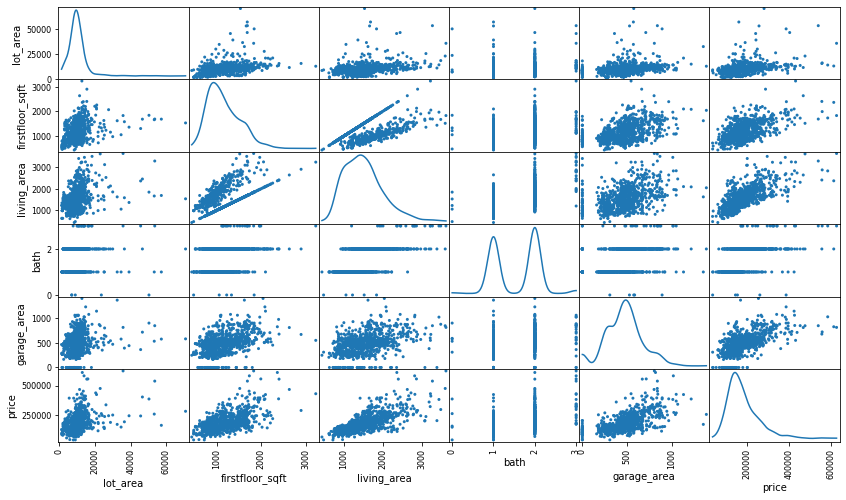

In [4]:
features = pd.plotting.scatter_matrix(x_train, figsize=(14,8), alpha=1, diagonal='kde')
#columns = pd.plotting.scatter_matrix(columns, figsize=(14,8), alpha=1, diagonal='kde')

Based on the scatter matrix above, write a brief description of what you observe. In thinking about the description, think about the relationship and whether linear regression is an appropriate choice for modelling this data.

#### a. lot_area 
My initial intutions tell me that lot_area would be the best indicator of price; that being said, there is a weak correlation between lot_area and the other features, which is a good sign! However, the distribution is dramatically skewed-right indicating that the mean lot_area is greater than the median. This tells me that lot_area stays around the same size while price increases. In turn, that tells me that some other feature is helping determine the price bceause if lot_area we're determining the increase in price, we'd see a linear distribution. In determining the best feature for my linear regression model, I think lot_area may be one of the least fitting to use.

#### b. firstfloor_sqft
There is a stronger correlation between firstfloor_sqft and the other features. The distrubution is still skewed-right making the median a better measure of center. firstfloor_sqft would be a good candidate for the linear regression model becuse of the stronger correlation and wider distribution; however, there appears to be a overly strong, linear correlation between firstfloor_sqft and living_area. Given that this linear correlation goes against the Regression Assumption that "all inputs are linearly independent," I would not consider using both in my model. I could, however, use one or the other. 

#### c. living_area
There is a similarly strong correlation between living_area (as compared to firstfloor_sqft) and the other features, but these plots are better distributed than firstfloor_sqft. A right skew still exists, but less so than the firstfloor_sqft. However, the observation of a strong, linear correlation between firstfloor_sqft and living_area (or living_area and firstfloor_sqft) is reinforced here. Thus, I would not use both of these in my final model and having to choose between the two, I will likely choose living_area since it appears to be more well-distributed. 

#### d. bath
Baths are static numbers, so the plots are much less distributed; however, the length and the clustering of the bath to living_area & bath to garage_area may indicate a correlation. Since I cannot use both living_area and firstfloor_sqft, and I think living_area has a better distribution, I would consider using bath in conjunction with living_area. 

#### e. garage_area 
Garage_area appears to be well-distributed with the lowest correlation between the other features. This could make it a great fit for the final regression model. It's also the least skewed right distribution. 

#### Correlation Matrix

In the code below, compute the correlation matrix and write a few thoughts about the observations. In doing so, consider the interplay in the features and how their correlation may affect your modeling.
 
The correlation matrix below is in-line with my thought process. Lot_area has the lowest correlation between it and the other features, but it's not well distributed. firstfloor_sqft has a strong correlation between it and living_area. Given that the correlation is just over 0.5, both features may be able to be used in the model given that the correlation isn't overly strong; however, to be most accurate, I plan to leave out one of them (likely firstfloor_sqft). living_area also reflects this strong correlation between it and firstfloor_sqft. Surprisingly, there is a strong correlation between living_area and bath. Looking solely at the scatter matrix, I did not see this strong correlation. This changes my approach slighltly, which I will outline below. garage_area, again, has the lowest correlations while being the most well-distributed.

#### Approach 
Given this new correlation information, I will approach the regression model in one of the following ways:
        1. Leave out bath as a feature and use living_area + garage_area.
        2. Swap firstfloor_sqft for living_area and include bath + garage area.
#### Conclusion
I'm not 100% sure if more features are better than less in this situation; however, I am sure that I want linearly independet features. 

In [76]:
# Use pandas correlation function
x_train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
lot_area,1.0,0.36,0.36,0.16,0.28,0.39
firstfloor_sqft,0.36,1.0,0.53,0.39,0.47,0.61
living_area,0.36,0.53,1.0,0.63,0.44,0.72
bath,0.16,0.39,0.63,1.0,0.4,0.56
garage_area,0.28,0.47,0.44,0.4,1.0,0.63
price,0.39,0.61,0.72,0.56,0.63,1.0


## 1. Build Your Model

Now that we have explored the data at a high level, let's build our model. From our sessions, we have discussed both closed form solution, gradient descent and using packages. In this section you will create your own estimators. Starter code is provided to makes this easier.


#### 1.1. Closed Form Solution
Recall: <br>
$$\beta_0 = \bar {y} - \beta_1 \bar{x}$$ <br>
$$\beta_1 = \frac {cov(x, y)} {var(x)}$$ <br>

Below, let's define functions that will compute these parameters

In [77]:
# Pass the necessary arguments in the function to calculate the coefficients

def compute_estimators(feature, target):
    n1 = np.sum(feature*target) - np.mean(target)*np.sum(feature)
    d1 = np.sum(feature*feature) - np.mean(feature)*np.sum(feature)
    
    # Compute the Intercept and Slope
    beta1 = n1/d1
    beta0 = np.mean(target) - beta1*np.mean(feature)
    
    return beta0, beta1 # Return the Intercept and Slope


Run the compute estimators function above and display the estimated coefficients for any of the predictors/input variables.

In [78]:
# Remember to pass the correct arguments
beta0, beta1 = compute_estimators(data1['living_area'], data1['price'])
print(beta0, beta1)

#### Computing coefficients for our model by hand using the actual mathematical equations
#y = beta1x + beta0
#print(y)

18569.02585648722 107.13035896582521


#### 1.2. sklearn solution

Now that we know how to compute the estimators, let's leverage the sklearn module to compute the metrics for us. We have already imported the linear model, let's initialize the model and compute the coefficients for the model with the input above.

In [79]:
# Initilize the linear Regression model here
model = linear_model.LinearRegression()

# Pass in the correct inputs
model.fit(data1[['living_area']], data1['price'])

# Print the coefficients
print("This is beta0:", model.intercept_)
print("This is beta1:", model.coef_) 
#### Computing coefficients for our model using the sklearn package 


This is beta0: 18569.025856487162
This is beta1: [107.13035897]


Do the results from the cell above and your implementation match? They should be very close to each other.
#### Yes!! They match!  

### 2. Model Evaluation

Now that we have estimated our single model. We are going to compute the coefficients for all the inputs. We can use a for loop for multiple model estimation. However, we need to create a few functions:

1\. Prediction function: Functions to compute the predictions <br>
2\. MSE: Function to compute Mean Square Error <br>

In [80]:
#Function that computes predictions of our model using the betas above + the feature data we've been using 
def model_predictions(intercept, slope, feature):
    """ Compute Model Predictions """
    y_hat = (slope*feature)+intercept
    
    return y_hat

y_hat = model_predictions(beta0, beta1, data1['living_area'])

#Function to compute MSE which determines the total loss for each predicted data point in our model
def mean_square_error(y_outcome, predictions):
    """ Compute the mean square error """
    mse = (np.sum((y_outcome - predictions) ** 2))/np.size(predictions)
    
    return mse

mse = mean_square_error(target, y_hat)
print(mse)

8957196059.803959


The last function we need is a plotting function to visualize our predictions relative to our data.


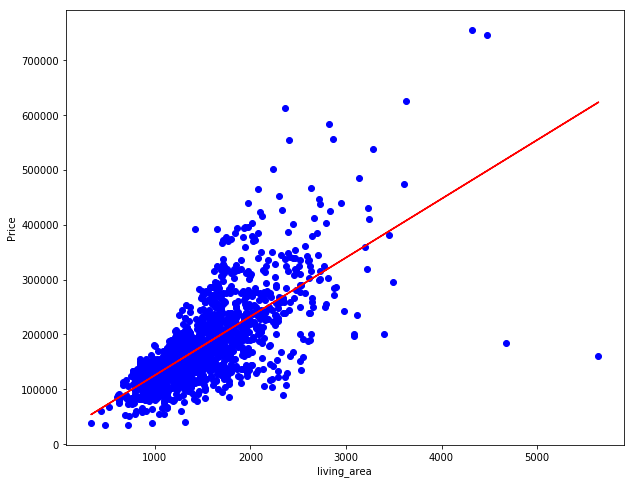

In [81]:
#Function used to plot the data
def plotting_model(feature, target, predictions, name):
    """ Create a scatter and predictions  """
    fig = plt.figure(figsize=(10,8)) 
    plot_model = model.fit(feature, target)
    plt.scatter(x=feature, y=target, color='blue')
    plt.plot(feature, predictions, color='red')
    plt.xlabel(name)
    plt.ylabel('Price')

    return model

model = plotting_model(data1[['living_area']], data1['price'], y_hat, data1['living_area'].name)


## Considerations/Reasoning

#### Data Integrity
After my inital linear model based on the feature "living area," I've eliminated 8 data points. If you look at the graph above, there are 4 outliers that are clear, and at least 4 others that follow a similar trend based on the x, y relationship. I used ~3500 sqft of living area as my cutoff for being not predictive of the model, and any price above 600000. Given the way these data points skew the above model, they intuitively appear to be outliers with high leverage. I determined this by comparing these high leverag points with points similar to it in someway and determined whether it was an outlier (i.e. if point A's price was abnormally high, I found a point (B) with living area at or close to point A's living area and compared the price. vice versa if living area was abnormally high).

#### Inital Feature Analysis - "Best" Feature (a priori)
Living area is the best metric to use to train the linear model because it incorporates multiple of the other features within it: first floor living space & bath. Living area has a high correlation with both first floor sq ft (0.53) and baths (0.63). Based on the other correlations, these are the two highest, and thus should immediately be eliminated. Additionally, based on initial intuition, one would assume that an increase in the metric "firstfloor sqft" will lead to an increase in the "living area" metric; if both firstfloor sqft and overall living area are increased, the "bath" metric will likely also increase to accommodate the additional living area/sqft in a home. Thus, I will not need to use them in my model because these can be accurately represented by the feature "living area."


### Single Feature Assessment

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area
beta0: 71321.26360425558
beta1: 230.2030162829738
mean squared error: 3466639234.8407283

lot_area
beta0: 127368.85540055121
beta1: 5.232206926890248
mean squared error: 5049292305.478467

firstfloor_sqft
beta0: 30417.01964454449
beta1: 129.30518669452894
mean squared error: 3582314928.964111

bath
beta0: 58167.54993139299
beta1: 77960.26632816301
mean squared error: 4026327007.394888



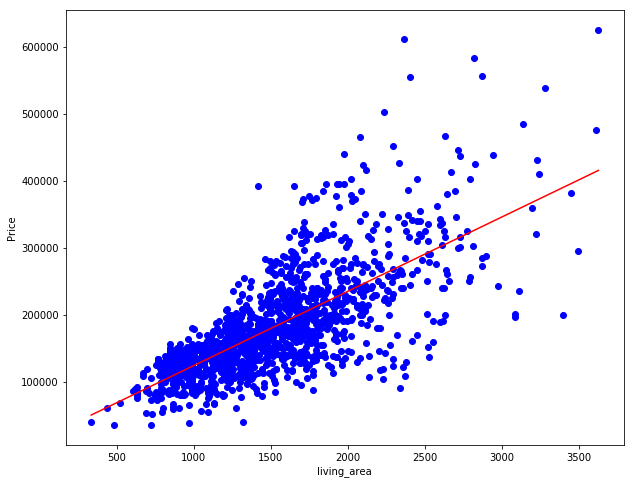

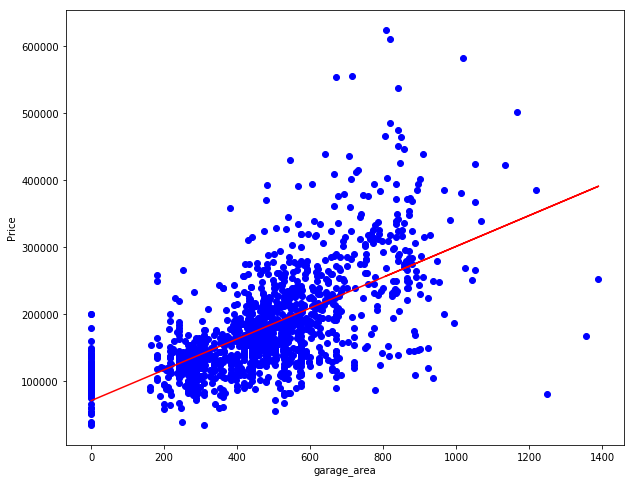

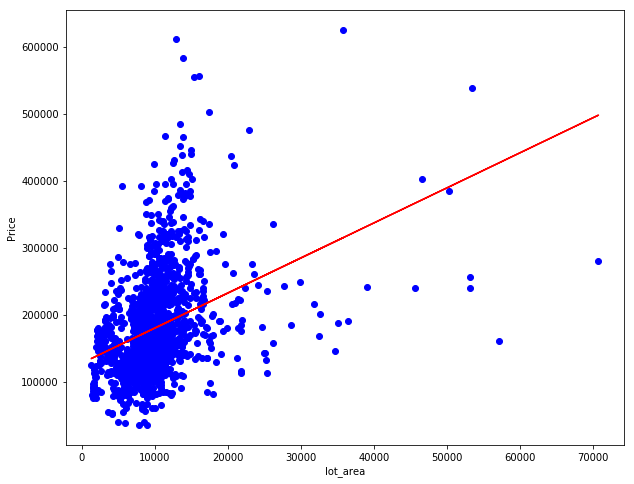

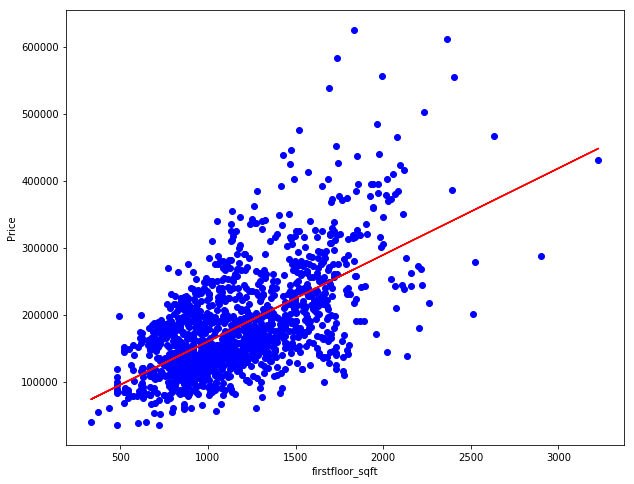

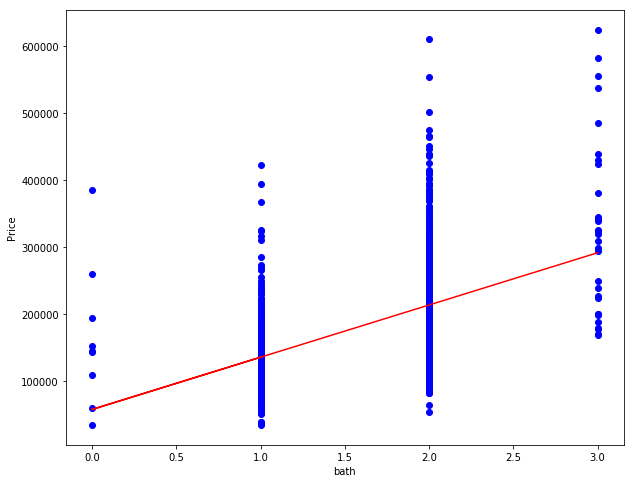

In [82]:
#Running each feature through to determine which has best linear fit
features = data[['living_area', 'garage_area', 'lot_area', 'firstfloor_sqft', 'bath']]
count = 0

for feature in features:
    feature = features.iloc[:, count]
    # Compute the Coefficients
    beta0, beta1 = compute_estimators(feature, target)
    count+=1
    
    # Print the Intercept and Slope
    print(feature.name)
    print('beta0:', beta0)
    print('beta1:', beta1)

    # Compute the Train and Test Predictions
    y_hat = model_predictions(beta0, beta1, feature)

    # Plot the Model Scatter  
    name = feature.name
    model = plotting_model(feature.values.reshape(-1, 1), target, y_hat, name)
    
    # Compute the MSE
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()
    

#### Analysis of Feature Linear Models

After eliminating these 8 data points, MSE for Living Area drop significantly from 8957196059.803959 to 2815789647.7664313. In fact, Living Area has the lowest MSE 2815789647.7664313 of all the individual models, and the best linear fit.

Garage Area is the next lowest MSE 3466639234.8407283, and the model is mostly linear; however, the bottom left of the model is concerning. You'll notice that a large number of data points go vertically upward indicating an increase in price with 0 garage area. That says to me that garage area isn't predicting the price of these homes, which indicates that it may be a good feature to use in conjunction with another feature (i.e. Living Area) or since those data points do not fit in with the rest of the population, they may need to be removed.

#### Run Model Assessment

Now that we have our functions ready, we can build individual models, compute preductions, plot our model results and determine our MSE. Notice that we compute our MSE on the test set and not the train set



### Dot Product (multiple feature) Assessment

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area * living_area
beta0: 88675.9456927962
beta1: 0.12034374773425742
mean squared error: 2064321922.99655

lot_area * living_area
beta0: 123251.8606427904
beta1: 0.0035276987010394866
mean squared error: 3802170878.8921647

firstfloor_sqft * living_area
beta0: 81727.47465317308
beta1: 0.053467447469143566
mean squared error: 2456865745.3672667

bath * living_area
beta0: 91196.33728151293
beta1: 35.14797065578143
mean squared error: 2904899481.7202654



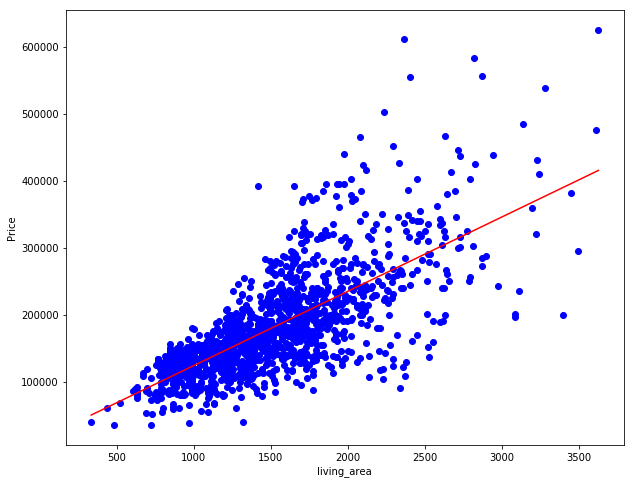

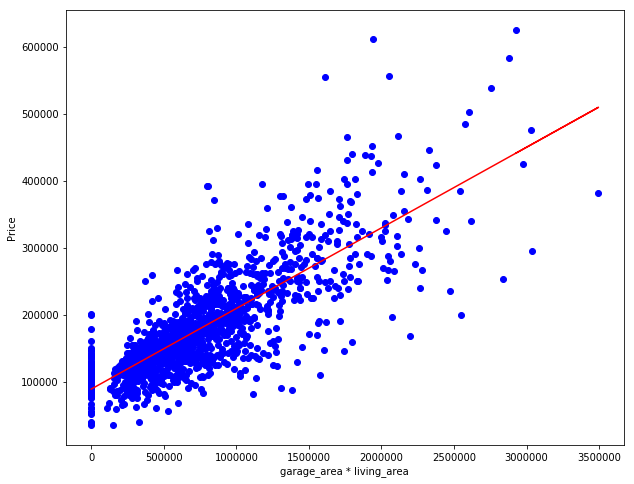

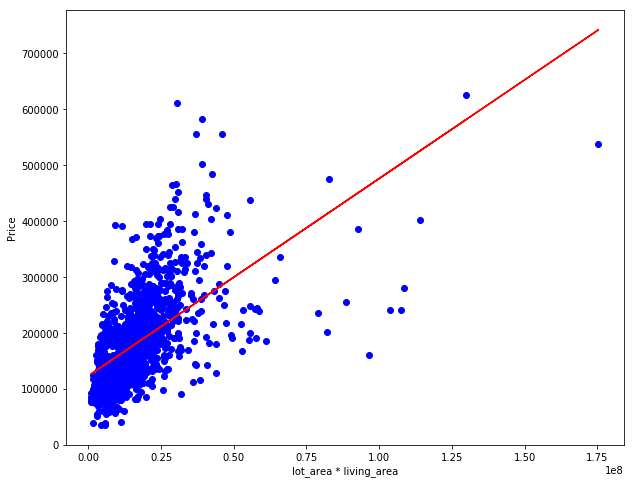

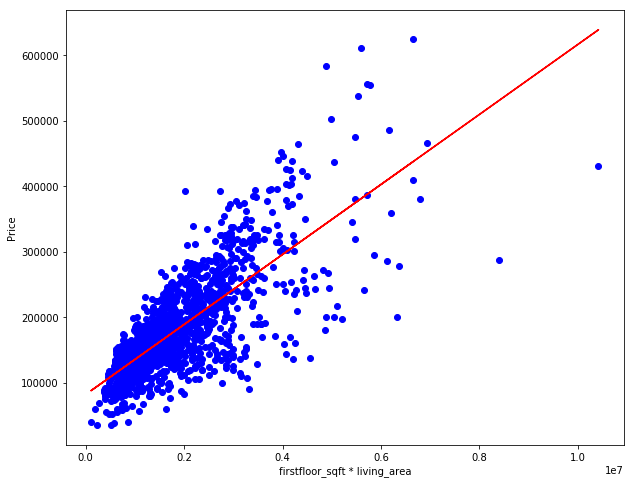

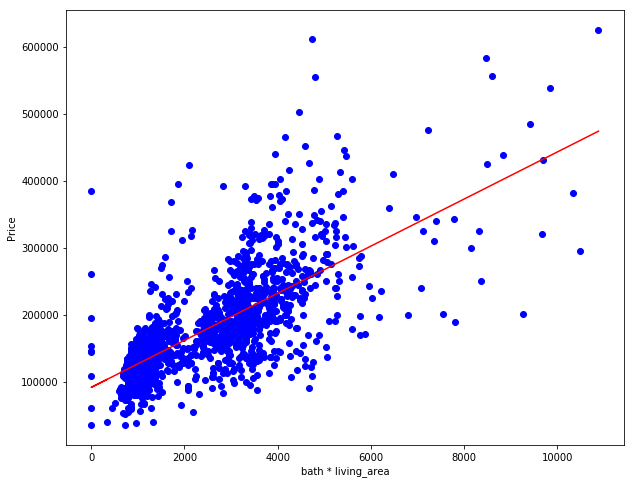

In [83]:
#Models Living Area alone and compares it to the Dot Product of Living Area with each other feature
##Determining if a MLR would be a better way to visualize the data
features = data[['living_area', 'garage_area', 'lot_area', 'firstfloor_sqft', 'bath']]
count = 0

for feature in features:
    feature = features.iloc[:, count]
    #print(feature.head(0))
    if feature.name == 'living_area':
        x = data['living_area']
    else:
        x = feature * data['living_area']
    # Compute the Coefficients
    beta0, beta1 = compute_estimators(x, target)
    
    # Print the Intercept and Slope
    if feature.name == 'living_area':
        print('living_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    else: 
        print(feature.name, "* living_area") 
        print('beta0:', beta0)
        print('beta1:', beta1)

    # Compute the Train and Test Predictions
    y_hat = model_predictions(beta0, beta1, x)

    # Plot the Model Scatter  
    if feature.name == 'living_area':
        name = 'living_area'
    else:
        name = feature.name + " " + "* living_area" 
    model = plotting_model(x.values.reshape(-1, 1), target, y_hat, name)
    
    # Compute the MSE
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()
    count+=1
    

## Analysis

Based on the models, it appears that two of the dot products provide a more accurate model:
    
    1. Living Area * First Floor SqFt
    2. Living Area * Garage Area 
    
These two dot products provide a lower MSE and thus lowers the loss per prediction point.

#1.
My intuition says that since Living Area, as a feature, will include First Floor SqFt in its data. The FirstFloor SqFt can be captured by Living Area, so it can be left out. Additionally, since one is included within the other, we cannot say anything in particular about Living Area or FirstFloor SqFt individually. Also, the correlation (Ln 24 & Out 24) between Living Area and FirstFloor SqFt is 0.53, which is the highest apart from Bath. This correlation is low in comparison to the "standard;" however, that standard is arbitrary. I've lowered it to be in context with data sets I'm working with in this notebook.

#2.
The dot product of Living Area & Garage Area provides doesn't allow us to make a statement about each individually, unless we provide a model of each, which I will do below. This dot product is a better model. Garage Area is advertised as 'bonus' space and CANNOT be included in the overall square footage of the home (i.e. living area). Thus, garage area vector will not be included as an implication within the living area vector making them linearly independent. 

Garage Area can be a sought after feature depending on a buyer's desired lifestlye; more garage space would be sought after by buyers with more cars, which allows us to draw a couple possible inferences about the buyers:

    1. enough net worth/monthly to make payments on multiple vehicles plus make payments on a house/garage
    2. enough disposable income to outright buy multiple vehicles plus make payments on a house/garage

Additionally, it stands to reason that garage area would scale with living area for pragmatic reasons (more living area implies more people and potentially more vehicles) and for aesthetic reasons (more living area makes home look larger and would need larger garage).

Homes with more living area and garage area may be sought after by buyers with the ability to spend more on a home, and thus the market would bear a higher price for those homes, which helps explain why living area * garage area is a better indicator of home price.

#### Conclusion
Combining living area with other features lowered the MSE for each. The lowest MSE is living area * garage area, which confirms my hypothesis: Living Area is the best feature to predict price, and garage area is good when used in conjunction. 

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area
beta0: 71321.26360425558
beta1: 230.2030162829738
mean squared error: 3466639234.8407283



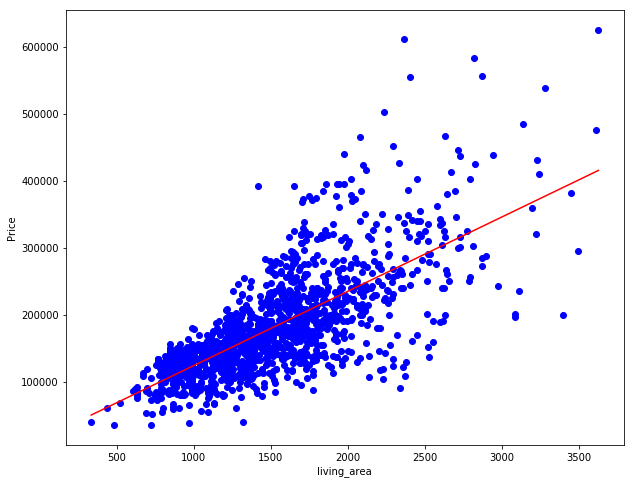

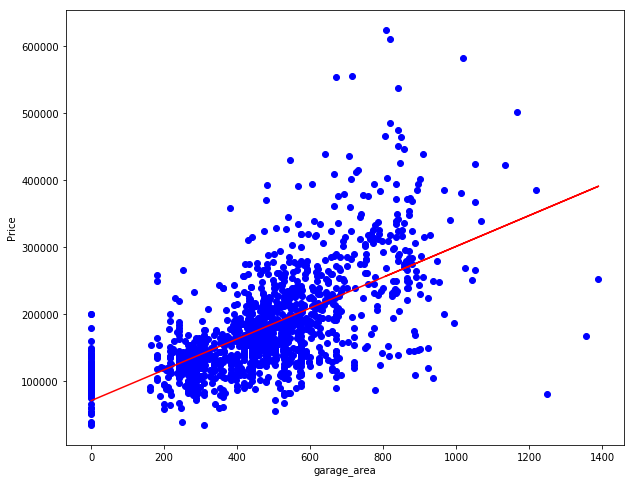

In [84]:
#Modeling Living Area & Garage Area separately.
features = data[['living_area', 'garage_area']]
count = 0
for feature in features:
    feature = features.iloc[:, count]
    if feature.name == 'living_area':
        x = data['living_area']
    elif feature.name == 'garage_area':
        x = data['garage_area']
    
    beta0, beta1 = compute_estimators(x, target)
    count+=1
    
    if feature.name == 'living_area':
        print('living_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    elif feature.name == 'garage_area':
        print('garage_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    
    y_hat = model_predictions(beta0, beta1, x)
    
    if feature.name == 'living_area':
        name = 'living_area'
    elif feature.name == 'garage_area':
        name = 'garage_area'
    model = plotting_model(x.values.reshape(-1, 1), target, y_hat, name)
    
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()

Name: garage_area * living_area
beta0: 88675.9456927962
beta1: 0.12034374773425742
mean squared error: 2064321922.99655



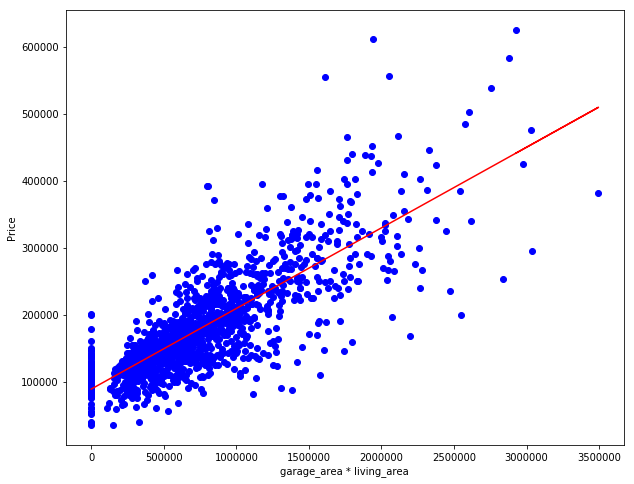

In [90]:
#Modeling dot product of Living Area * Garage Area 
features = data[['living_area']]
x = features.iloc[:, 0]
x2 = x * data['garage_area']
#x3 = x2 * data['bath']

# Compute the Coefficients
beta0, beta1 = compute_estimators(x2, target)

# Print the Intercept and Slope
print('Name: garage_area * living_area')
print('beta0:', beta0)
print('beta1:', beta1)

# Compute the Train and Test Predictions
y_hat_1 = model_predictions(beta0, beta1, x2)

# Plot the Model Scatter  
name = 'garage_area * living_area'
model = plotting_model(x2.values.reshape(-1, 1), target, y_hat_1, name)

# Compute the MSE
mse = mean_square_error(target, y_hat_1)
print('mean squared error:', mse)
print()


## Reasoning
Above, I modeled both living area and garage area by themselves then the dot product of Living Area * Garage Area to highlight the MSE of each vs. the MSE of the dot product. Garage Area, much more so than Living Area, has a high MSE indicating that on its own, Garage Area isn't the best predictor of a home's price; we must take the data in context with reality, and intuitively speaking, one wouldn't assume that the garage area, on its own, would be a feature indicative of price. 

This fact combined with the assumption/implication that garage may scale with living area implies some correlation between the features, which would go against the linear assumption of feature independence. As a matter of fact, there is a correlation between them (Ln 24 & Out 24) of 0.44; however, this isn't problematic for two reasons:

    1. 0.44 is quite low in regard to typical correlation standards.
    2. Data must be seen in context. 
    
#1.
Although I eliminated First Floor SqFt due, in part, to a high correlation and that correclation is only 0.09 points lower. The main reason why First Floor SqFt is eliminated is due to its inclusion within the living area vector. Additionally, the main reason why I'm including garage area is because it is not included with the living area vector.

#2.
Similar to my #1 explanation, knowing that garage area is 'bonus space' and, as such, is NOT included in a home's advertised square feet indicates that it isn't within the Living Area data set in the same way FF SqFt or Baths would be. It will most likely to scale with the living area independently of the living area making it a good fit for a MLR.

### 3. Model Interpretation

Now that you have calculated all the individual models in the dataset, provide an analytics rationale for which model has performed best. To provide some additional assessment metrics, let's create a function to compute the R-Squared.

#### Mathematically:

$$R^2 = \frac {SS_{Regression}}{SS_{Total}} = 1 - \frac {SS_{Error}}{SS_{Total}}$$<br>

where:<br>
$SS_{Regression} = \sum (\widehat {y_i} - \bar {y_i})^2$<br>
$SS_{Total} = \sum ({y_i} - \bar {y_i})^2$<br>
$SS_{Error} = \sum ({y_i} - \widehat {y_i})^2$




In [86]:
#ssr = sum of squares of regression --> variance of prediction from the mean
#sst = sum of squares total --> variance of the actuals from the prediction
#sse = sume of squares error --> variance of the atuals from the mean
def r_squared(y_outcome, predictions):
    """ Compute the R Squared """
    ssr = np.sum((predictions - np.mean(y_outcome))**2)
    sst = np.sum((y_outcome - np.mean(y_outcome))**2)
    sse = np.sum((y_outcome - predictions)**2)
    
#    print(sse, "/", sst)
    print("1 - SSE/SST =", round((1 - (sse/sst))*100), "%")
    
    rss = (ssr/sst) * 100
    
    return rss

Now that you we have R Squared calculated, evaluate the R Squared for the test group across all models and determine what model explains the data best. 

In [87]:
rss = r_squared(target, y_hat_1)
print("R-Squared =", round(rss), "%")
count += 1

1 - SSE/SST = 65.0 %
R-Squared = 65.0 %


### R-Squared Adjusted

$R^2-adjusted = 1 - \frac {(1-R^2)(n-1)}{n-k-1}$

In [88]:
def r_squared_adjusted(rss, sample_size, regressors):
    n = np.size(sample_size)
    k = regressors
    numerator = (1-rss)*(n)
    denominator = n-k-1
    rssAdj = 1 - (numerator / denominator)
    
    return rssAdj

rssAdj = r_squared_adjusted(rss, y_hat_1, 2)

In [89]:
print(round(rssAdj), "%")

65.0 %


### 4. Model Diagnostics

Linear regressions depends on meetings assumption in the model. While we have not yet talked about the assumptions, you goal is to research and develop an intuitive understanding of why the assumptions make sense. We will walk through this portion on Multiple Linear Regression Project